In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
data = pd.read_csv('twitter_training.csv')
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
data.columns = ['id','information','type','text']
data.head()

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
nltk.download('punkt')
nltk.download('stopwords')

# Remove rows with missing values
data.dropna(subset=['text'], inplace=True)

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return ' '.join(tokens)

data['preprocess_text'] = data['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Fill missing values with an empty string
data['text'].fillna('', inplace=True)

sia = SentimentIntensityAnalyzer()

def sentiment_analysis(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return 'positive'
    elif sentiment['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['text'].apply(sentiment_analysis)

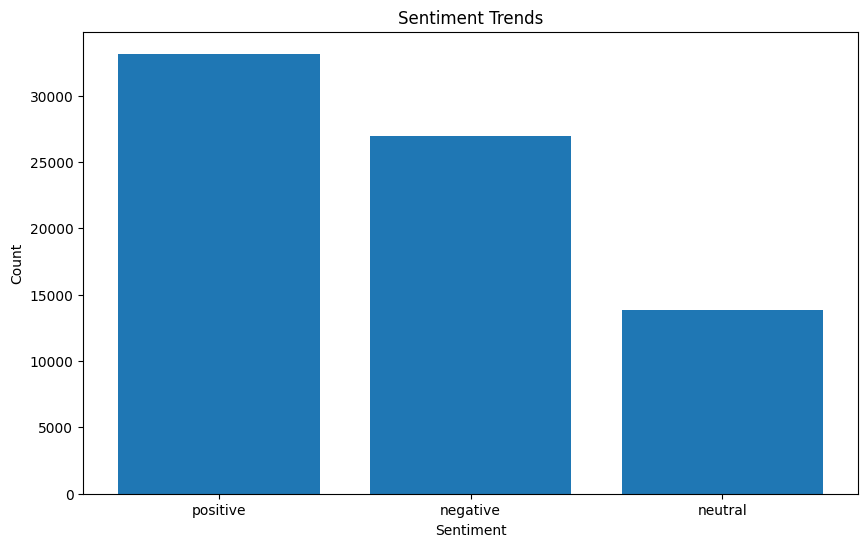

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(data['sentiment'].value_counts().index, data['sentiment'].value_counts().values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Trends')
plt.show()